<div align="right">
<strong>Club de Python para Físicos</strong> - Sat 03/04/2021
</div>

# Manejo de datos n-dimensionales en python: *conociendo xarray*  

<br>
<div align="center">
    <img src="http://xarray.pydata.org/en/stable/_static/dataset-diagram-logo.png">
</div>
<br>

Gerardo Rivera Tello  
*Asistente de Investigación*  
*Instituto Geofísico del Perú*



## Temas a tratar

**1.** Ciencias del clima - especialmente oceanografía

**2.** I/O y análisis de datos - numpy + pandas -> xarray

**3.** Escalando la computación - integraciones con dask

**4.** El ecosistema Pangeo en python

### ¿Por qué Python?

- Es flexible: permite la rápida iteración de ideas

- Es open-source: crece conjuntamente con la comunidad

- Es complejamente simple: ¿o simplemente complejo?

- Big data frameworks: en gran variedad

## ¿Cómo se usa python en ciencias del clima?

**Modelamiento Numérico**  
o interfaces a modelos numéricos



- Climlab: https://climlab.readthedocs.io/en/latest/  
- CliMT: https://climt.readthedocs.io/en/latest/  
- PyCPT: https://iri.columbia.edu/our-expertise/climate/tools/cpt/  
- Veros: https://veros.readthedocs.io/en/latest/  
- xarray-simlab: https://xarray-simlab.readthedocs.io/en/latest/

**Análisis de Datos**  
o herramientas de I/O especializadas

- xarray: http://xarray.pydata.org/en/stable/  
    - xgcm: https://xgcm.readthedocs.io/en/latest/  
    - xmitgcm: https://xgcm.readthedocs.io/en/latest/  
    - xESMF: https://pangeo-xesmf.readthedocs.io/en/latest/  
    - y más: http://xarray.pydata.org/en/stable/related-projects.html  
- climpred: https://climpred.readthedocs.io/en/stable/  
- wrf-python: https://wrf-python.readthedocs.io/en/latest/
- MetPy: https://unidata.github.io/MetPy/dev/index.html  
- SatPy: https://satpy.readthedocs.io/en/stable/

## Entrada y Salida de Datos

### ¿Cual es el mejor formato de almacenamiento de datos?

<div style="font-size: 10px">
    <s> y ¿por qué es zarr? </s>
</div>

**Formatos más comunes**  

<br>
  
| Datos Tabulares | Data Cubes | Otros tipos de formatos |
| :-: | :-: | :-: |
| txt (no necesariamente) | HDF5 | pickle (Python) |
| CSV | NetCDF | npy (Numpy) |
| XLSX | GRIB | TIFF/GeoTIFF |
| parquet | zarr | - |

### ¿Cómo podemos leer estos formatos?

<img src="https://numpy.org/doc/stable/_static/numpylogo.svg" width=25%>

Los datos que puedan ser representados como arreglos (o matrices) son bien manejados por numpy

Vamos a leer los datos del ONI obtenidos de la página de la NOAA, el cual tiene la siguiente estructura  

<br>

```
year1 yearN
year1 janval febval marval aprval mayval junval julval augval sepval octval novval decval
year2 janval febval marval aprval mayval junval julval augval sepval octval novval decval
...
yearN janval febval marval aprval mayval junval julval augval sepval octval novval decval
missing_value
```

Con una simple inspección, podemos ver las lineas que debemos omitir para tener un arreglo correcto

In [1]:
!head data/oni.data | nl -v 0

     0	 1950         2021
     1	 1950  -1.53  -1.34  -1.16  -1.18  -1.07  -0.85  -0.54  -0.42  -0.39  -0.44  -0.60  -0.80
     2	 1951  -0.82  -0.54  -0.17   0.18   0.36   0.58   0.70   0.89   0.99   1.15   1.04   0.81
     3	 1952   0.53   0.37   0.34   0.29   0.20   0.00  -0.08   0.00   0.15   0.10   0.04   0.15
     4	 1953   0.40   0.60   0.63   0.66   0.75   0.77   0.75   0.73   0.78   0.84   0.84   0.81
     5	 1954   0.76   0.47  -0.05  -0.41  -0.54  -0.50  -0.64  -0.84  -0.90  -0.77  -0.73  -0.66
     6	 1955  -0.68  -0.62  -0.69  -0.80  -0.79  -0.72  -0.68  -0.75  -1.09  -1.42  -1.67  -1.47
     7	 1956  -1.11  -0.76  -0.63  -0.54  -0.52  -0.51  -0.57  -0.55  -0.46  -0.42  -0.43  -0.43
     8	 1957  -0.25   0.06   0.41   0.72   0.92   1.11   1.25   1.32   1.33   1.39   1.53   1.74
     9	 1958   1.81   1.66   1.27   0.93   0.74   0.64   0.57   0.43   0.39   0.44   0.50   0.61


In [2]:
!tail data/oni.data | tac | nl | tac

    10	 2020   0.50   0.48   0.40   0.19  -0.08  -0.30  -0.41  -0.57  -0.89  -1.17  -1.27  -1.19
     9	 2021  -1.06 -99.90 -99.90 -99.90 -99.90 -99.90 -99.90 -99.90 -99.90 -99.90 -99.90 -99.90
     8	  -99.9
     7	 ONI from CPC
     6	  Provided by NOAA/PSL
     5	  From http://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt
     4	 As of 09/20/2015, uses NOAA ERSST V5 from V3
     3	 represents 3 month running mean of ERSST.v5 SST
     2	 anomalies in the Niño 3.4 region 
     1	 (5N-5oS, 120o-170oW)]


In [3]:
!wc -l data/oni.data

81 data/oni.data


Con la información recolectada, podemos leer estos datos pasando los parámetros correctos.

In [4]:
import numpy as np

ONI = np.loadtxt("data/oni.data", skiprows=1, max_rows=72)
ONI.shape

(72, 13)

Digamos que queremos seleccionar el valor del ONI para el año 2010 en el mes de Febrero.  

**¿Cómo lo podemos hacer?**

Indexing al rescate

In [5]:
# El primer valor de cada fila es el año, asi que primero
# debemos encontrar la fila donde 2010 sea el primer elemento

print(ONI[60])  # no siempre se le atina a la primera
print("Year ", ONI[60, 0])

[ 2.01e+03  1.50e+00  1.22e+00  8.40e-01  3.50e-01 -1.70e-01 -6.60e-01
 -1.05e+00 -1.35e+00 -1.56e+00 -1.64e+00 -1.64e+00 -1.59e+00]
Year  2010.0


In [6]:
# Este es el valor que buscamos
ONI[60, 2]

1.22

Usando `numpy` es necesario mantener un registro de las dimensiones y operaciones que realizamos para asegurarnos que se esté seleccionando el elemento correcto.  

La especialidad de `numpy` en el manejo de arreglos n-dimensionales puede facilmente irse de control en arreglos más grandes al no tener un control explicito de las dimensiones con las que queremos trabajar.

**¿Existira una forma más facil de manejar esto?**

La respuesta es <span style="font-size: 50px">SI</span> <span style="font-size: 10px"><s> y no </s></span>

Todo depende de la estructura de los datos que queremos leer

<img src="https://pandas.pydata.org/docs/_static/pandas.svg" width=25%>

Los datos tabulares son muy bien manejados con pandas

Como ejemplo, vamos a leer un archivo descargado de la red AERONET de la NASA, especificamente de la estación de Huancayo-IGP.

Podemos explorar parte de la estructura usando el comando head en linux

In [7]:
!head data/20150101_20211231_Huancayo-IGP.lev20 | nl

     1	AERONET Version 3; 
     2	Huancayo-IGP
     3	Version 3: AOD Level 2.0
     4	The following data are automatically cloud cleared and quality assured with pre-field and post-field calibration applied.
     5	Contact: PI=Yamina_Silva_Vidal; PI Email=fsilva@igp.gob.pe
     6	Daily Averages,UNITS can be found at,,, https://aeronet.gsfc.nasa.gov/new_web/units.html
     7	Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,AOD_667nm,AOD_620nm,AOD_560nm,AOD_555nm,AOD_551nm,AOD_532nm,AOD_531nm,AOD_510nm,AOD_500nm,AOD_490nm,AOD_443nm,AOD_440nm,AOD_412nm,AOD_400nm,AOD_380nm,AOD_340nm,Precipitable_Water(cm),AOD_681nm,AOD_709nm,AOD_Empty,AOD_Empty,AOD_Empty,AOD_Empty,AOD_Empty,440-870_Angstrom_Exponent,380-500_Angstrom_Exponent,440-675_Angstrom_Exponent,500-870_Angstrom_Exponent,340-440_Angstrom_Exponent,440-675_Angstrom_Exponent[Polar],N[AOD_1640nm],N[AOD_1020nm],N[AOD_870nm],N[AOD_865nm],N[AOD_779nm],N[AOD_675nm],N[AOD_667nm],N[AOD_62

Los datos tabulares se almacenan de diferentes formas, por ello es bueno conocer parte de la estructura para obtener el resultado deseado.

In [8]:
import pandas as pd

aeronet = pd.read_csv("data/20150101_20211231_Huancayo-IGP.lev20", skiprows=6)
aeronet.head()

,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,AOD_667nm,...,N[440-675_Angstrom_Exponent],N[500-870_Angstrom_Exponent],N[340-440_Angstrom_Exponent],N[440-675_Angstrom_Exponent[Polar]],Data_Quality_Level,AERONET_Instrument_Number,AERONET_Site_Name,Site_Latitude(Degrees),Site_Longitude(Degrees),Site_Elevation(m)
0,20:03:2015,12:00:00,79,0.018201,0.023610,0.025333,-999.0,-999.0,0.031682,-999.0,...,32,32,32,0,lev20,890,Huancayo-IGP,-12.0402,-75.3209,3313.0
1,21:03:2015,12:00:00,80,0.004776,0.012473,0.013893,-999.0,-999.0,0.020682,-999.0,...,1,1,1,0,lev20,890,Huancayo-IGP,-12.0402,-75.3209,3313.0
2,22:03:2015,12:00:00,81,0.008359,0.012901,0.012335,-999.0,-999.0,0.015436,-999.0,...,4,4,4,0,lev20,890,Huancayo-IGP,-12.0402,-75.3209,3313.0
3,23:03:2015,12:00:00,82,0.011493,0.019424,0.018699,-999.0,-999.0,0.025666,-999.0,...,8,8,8,0,lev20,890,Huancayo-IGP,-12.0402,-75.3209,3313.0
4,24:03:2015,12:00:00,83,0.007365,0.011363,0.011387,-999.0,-999.0,0.014973,-999.0,...,68,68,68,0,lev20,890,Huancayo-IGP,-12.0402,-75.3209,3313.0


A veces se necesitan realizar algunos ajustes para trabajar con los datos de la forma que queremos, como por ejemplo, las fechas

In [9]:
aeronet.dtypes

Date(dd:mm:yyyy)              object
Time(hh:mm:ss)                object
Day_of_Year                    int64
AOD_1640nm                   float64
AOD_1020nm                   float64
                              ...   
AERONET_Instrument_Number      int64
AERONET_Site_Name             object
Site_Latitude(Degrees)       float64
Site_Longitude(Degrees)      float64
Site_Elevation(m)            float64
Length: 81, dtype: object

In [10]:
aeronet.columns[0], aeronet.iloc[:, 0][0], type(aeronet.iloc[:, 0][0])

('Date(dd:mm:yyyy)', '20:03:2015', str)

Una solución a nuestras fechas podría ser aplicada al momento de la lectura de los datos.

In [11]:
aeronet = pd.read_csv(
    "data/20150101_20211231_Huancayo-IGP.lev20",
    skiprows=6,
    parse_dates=[[0, 1]],
    date_parser=lambda x: pd.to_datetime(x, format="%d:%m:%Y %X"),
)
aeronet.rename(columns={aeronet.columns[0]: "Date"}, inplace=True)
aeronet.head()

,Date,Day_of_Year,AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,AOD_667nm,AOD_620nm,...,N[440-675_Angstrom_Exponent],N[500-870_Angstrom_Exponent],N[340-440_Angstrom_Exponent],N[440-675_Angstrom_Exponent[Polar]],Data_Quality_Level,AERONET_Instrument_Number,AERONET_Site_Name,Site_Latitude(Degrees),Site_Longitude(Degrees),Site_Elevation(m)
0,2015-03-20 12:00:00,79,0.018201,0.023610,0.025333,-999.0,-999.0,0.031682,-999.0,-999.0,...,32,32,32,0,lev20,890,Huancayo-IGP,-12.0402,-75.3209,3313.0
1,2015-03-21 12:00:00,80,0.004776,0.012473,0.013893,-999.0,-999.0,0.020682,-999.0,-999.0,...,1,1,1,0,lev20,890,Huancayo-IGP,-12.0402,-75.3209,3313.0
2,2015-03-22 12:00:00,81,0.008359,0.012901,0.012335,-999.0,-999.0,0.015436,-999.0,-999.0,...,4,4,4,0,lev20,890,Huancayo-IGP,-12.0402,-75.3209,3313.0
3,2015-03-23 12:00:00,82,0.011493,0.019424,0.018699,-999.0,-999.0,0.025666,-999.0,-999.0,...,8,8,8,0,lev20,890,Huancayo-IGP,-12.0402,-75.3209,3313.0
4,2015-03-24 12:00:00,83,0.007365,0.011363,0.011387,-999.0,-999.0,0.014973,-999.0,-999.0,...,68,68,68,0,lev20,890,Huancayo-IGP,-12.0402,-75.3209,3313.0


Verificando

In [12]:
aeronet.dtypes

Date                         datetime64[ns]
Day_of_Year                           int64
AOD_1640nm                          float64
AOD_1020nm                          float64
AOD_870nm                           float64
                                  ...      
AERONET_Instrument_Number             int64
AERONET_Site_Name                    object
Site_Latitude(Degrees)              float64
Site_Longitude(Degrees)             float64
Site_Elevation(m)                   float64
Length: 80, dtype: object

In [13]:
aeronet.columns[0], aeronet.iloc[:, 0][0], type(aeronet.iloc[:, 0][0])

('Date',
 Timestamp('2015-03-20 12:00:00'),
 pandas._libs.tslibs.timestamps.Timestamp)

Digamos que queremos seleccionar los datos del 15 de enero del 2017. Para eso, pandas tiene sus propios métodos de selección que facilitan dicha tarea.

In [14]:
# Esta forma podría ser una de las mas simples de selección en pandas.
# El método query es muy útil para estas tareas

aeronet.query("Date == '2017-01-15 12:00:00'")

,Date,Day_of_Year,AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,AOD_667nm,AOD_620nm,...,N[440-675_Angstrom_Exponent],N[500-870_Angstrom_Exponent],N[340-440_Angstrom_Exponent],N[440-675_Angstrom_Exponent[Polar]],Data_Quality_Level,AERONET_Instrument_Number,AERONET_Site_Name,Site_Latitude(Degrees),Site_Longitude(Degrees),Site_Elevation(m)
586,2017-01-15 12:00:00,15,0.016485,0.023729,0.026584,-999.0,-999.0,0.031273,-999.0,-999.0,...,38,38,38,0,lev20,929,Huancayo-IGP,-12.0402,-75.3209,3313.0


un poco mas sencillo que hacer indexing, ¿cierto?

`pandas` es una herramienta altamente versátil que provee muchas operaciones convenientes de selección y agrupación.

Pero ... ¿podría ser mejor?

Otra vez <span style="font-size: 50px">SI</span> <span style="font-size: 10px"><s> y no</s></span>

<img src="http://xarray.pydata.org/en/stable/_static/dataset-diagram-logo.png" width=25%>

Es un paquete al que podriamos considerar como una combinación de los arreglos n-dimensionales de numpy con las opciones de seleccion de pandas

<span style="font-size: 0.5em">Aunque eso sería una sobresimplificación</span>

Tomado de su [documentación](http://xarray.pydata.org/en/stable/):


>Xarray introduce etiquetas en forma de dimensiones, coordenadas y atributos sobre matrices multidimensionales de NumPy, lo cual permite una experiencia más intuitiva, más concisa y menos propensa a errores. 

**¿En qué se diferencia de `numpy` y `pandas`?**
<span style="font-size: 0.7em"> o ¿deberíamos preguntar hasta dónde son iguales? </span>

Todo depende de los datos que necesitemos leer. Los ejemplos provistos fueron solo para ilustrar una forma típica de ingesta de datos usando los paquetes mencionados: `numpy` con la capacidad de manejar datos n-dimensionales; y `pandas` con el uso de etiquetas en datos tabulares.  

`xarray` toma lo mejor de ambos para leer lo que se conoce como Data Cubes

<div align="center">
<img src="imgs/xarray_img.png" width=60%>
</div>
<a style="font-size: 0.8em" href="https://docs.google.com/presentation/d/16CMY3g_OYr6fQplUZIDqVtG-SKZqsG8Ckwoj2oOqepU/edit#slide=id.g67406e8d7_0_135">Imagen de Stephan Hoyer</a>

El modelo de datos usado en xarray esta basado en el formato NetCDF, lo cual lo vuelve la herramienta ideal para el manejo de datos n-dimensionales.

<div align="center">
<img src="https://www.unidata.ucar.edu/software/netcdf/workshops/most-recent/nc3model/images/ncfile.png">
</div>
<a style="font-size: 0.8em" href="https://www.unidata.ucar.edu/software/netcdf/workshops/most-recent/nc3model/NcFile.html">Imagen de UNIDATA</a>

Las operaciones se vuelven mas simples cuando se conoce explicitamente el nombre de las dimensiones con las que se trabaja

In [15]:
import xarray as xr
xr.set_options(display_style="text")

ds = xr.tutorial.open_dataset("air_temperature")
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Las variables se pueden acceder de manera individual por su nombre

In [16]:
air = ds.air
air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
[3869000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

La selección de datos acorde al nombre de su dimensión vuelve al código más explícito

In [17]:
air.sel(time="2014-02-10 06:00:00")

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[256.38998, 254.79999, 253.29999, ..., 242.79999, 244.09999, 246.     ],
       [250.59999, 249.29999, 248.59999, ..., 239.5    , 243.29999, 247.89   ],
       [248.7    , 247.59999, 247.29999, ..., 238.89   , 244.89   , 251.5    ],
       ...,
       [297.6    , 297.5    , 297.5    , ..., 292.9    , 292.4    , 291.6    ],
       [298.5    , 298.4    , 298.     , ..., 293.     , 292.79   , 292.5    ],
       [298.5    , 298.5    , 298.1    , ..., 293.69998, 293.4    , 293.9    ]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2014-02-10T06:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

O si preferimos usar los índices posicionales

In [18]:
air.isel(time = 1621)

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[256.38998, 254.79999, 253.29999, ..., 242.79999, 244.09999, 246.     ],
       [250.59999, 249.29999, 248.59999, ..., 239.5    , 243.29999, 247.89   ],
       [248.7    , 247.59999, 247.29999, ..., 238.89   , 244.89   , 251.5    ],
       ...,
       [297.6    , 297.5    , 297.5    , ..., 292.9    , 292.4    , 291.6    ],
       [298.5    , 298.4    , 298.     , ..., 293.     , 292.79   , 292.5    ],
       [298.5    , 298.5    , 298.1    , ..., 293.69998, 293.4    , 293.9    ]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2014-02-10T06:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

hasta incluso si preferimos los métodos antiguos

In [19]:
air[1621]

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[256.38998, 254.79999, 253.29999, ..., 242.79999, 244.09999, 246.     ],
       [250.59999, 249.29999, 248.59999, ..., 239.5    , 243.29999, 247.89   ],
       [248.7    , 247.59999, 247.29999, ..., 238.89   , 244.89   , 251.5    ],
       ...,
       [297.6    , 297.5    , 297.5    , ..., 292.9    , 292.4    , 291.6    ],
       [298.5    , 298.4    , 298.     , ..., 293.     , 292.79   , 292.5    ],
       [298.5    , 298.5    , 298.1    , ..., 293.69998, 293.4    , 293.9    ]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2014-02-10T06:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

Incluso se tiene acceso a ciertas operaciones de agregación de `numpy`, pero esta vez usando los nombres de las dimensiones

In [20]:
air.sel(time="2014-02-10").mean(dim="time")

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[256.7475 , 255.5    , 254.22498, ..., 242.99998, 244.29749,
        246.35   ],
       [254.35   , 253.02249, 251.875  , ..., 239.275  , 242.79999,
        247.345  ],
       [251.54999, 249.82498, 248.84749, ..., 239.745  , 245.3975 ,
        251.72499],
       ...,
       [297.2225 , 297.05   , 296.95   , ..., 293.49503, 292.625  ,
        291.9725 ],
       [297.77496, 297.8    , 297.6225 , ..., 293.475  , 293.22247,
        292.87003],
       [297.8975 , 297.96753, 297.75   , ..., 294.24997, 294.15   ,
        294.325  ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0

y muchas cosas más

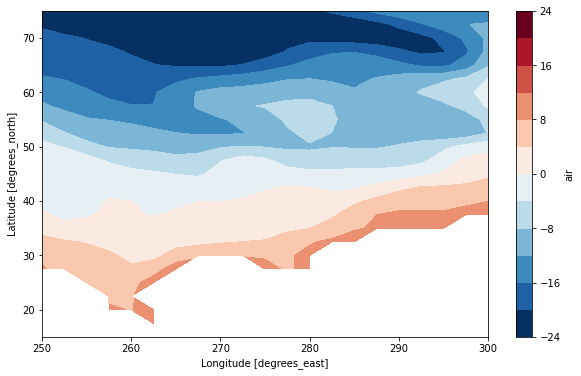

In [21]:
air_subset = air.sel(time=slice("2013-10-01", "2013-12-31"), lon=slice(250, 300)).pipe(lambda x: x -273.15)
air_subset_masked = air_subset.where(air_subset < 10)
air_subset_masked.mean(dim="time").plot.contourf(levels=16, figsize=(10,6))

La integración con matplotlib permite generar gŕaficos rápidos de nuestros datos, usando los atributos (o metadatos) para colocar las etiquetas y unidades tanto en los ejes como en la barra de colores

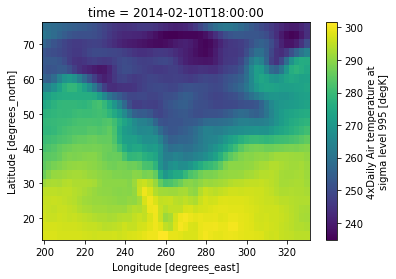

In [22]:
air.sel(time="2014-02-10 18:00").plot()

Las reglas de propagación de dimensiones (broadcasting) usadas en numpy tambien son aplicadas en xarray

<div align="center">
<img src="http://scipy-lectures.org/_images/numpy_broadcasting.png" width=60%>
</div>

<a style="font-size: 0.8em" href="http://scipy-lectures.org/intro/numpy/operations.html#broadcasting">Scipy Lecture Notes</a>

Manteniendo las dimensiones durante el proceso. `xarray` tambien es capaz de alinear los datos en coordenadas comunes.

<div align="center">
<img src="https://xarray-contrib.github.io/xarray-tutorial/_images/broadcasting.png" width=60%>
</div>

<a style="font-size: 0.8em" href="https://docs.google.com/presentation/d/16CMY3g_OYr6fQplUZIDqVtG-SKZqsG8Ckwoj2oOqepU/edit#slide=id.g67406e8d7_0_135">Imagen de Stephan Hoyer</a>

In [23]:
a = np.arange(3).reshape(3,1)
b = np.arange(4).reshape(1,4)
suma = a + b

print(f"{a.shape=}")
print(f"{b.shape=}")
print(f"{suma.shape=}")

a.shape=(3, 1)
b.shape=(1, 4)
suma.shape=(3, 4)


In [24]:
# tomado de https://fabienmaussion.info/acinn_xarray_workshop/#/8/1
a = xr.DataArray(np.arange(3), dims='time', 
                 coords={'time':np.arange(3)})
b = xr.DataArray(np.arange(4), dims='space', 
                 coords={'space':np.arange(4)})
a + b

<xarray.DataArray (time: 3, space: 4)>
array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5]])
Coordinates:
  * time     (time) int64 0 1 2
  * space    (space) int64 0 1 2 3

In [25]:
a = xr.DataArray(np.arange(3), dims='time', 
                 coords={'time':np.arange(3)})
a

<xarray.DataArray (time: 3)>
array([0, 1, 2])
Coordinates:
  * time     (time) int64 0 1 2

In [26]:
b = xr.DataArray(np.arange(4), dims='time', 
                 coords={'time':np.arange(1,5)})
b

<xarray.DataArray (time: 4)>
array([0, 1, 2, 3])
Coordinates:
  * time     (time) int64 1 2 3 4

In [27]:
a + b

<xarray.DataArray (time: 2)>
array([1, 3])
Coordinates:
  * time     (time) int64 1 2

## Escalando la computación

En la era actual, la cantidad de datos que se generan sobrepasan nuestra habilidad para analizarlos.  

Los paquetes usados para la computación científica en python no escalan muy bien con grandes cantidades de datos, especialmente cuando la memoria del sistema no puede contener toda la información al mismo tiempo

<div style="background-color: black" align="center">
<img src="https://dask.org/_images/dask_horizontal_white_no_pad.svg" width=25%>
</div>

Dask es la herramienta que escala la computación en python de manera nativa, integrandose perfectamente en el ecosistema científico de python

<div align="center">
<img src="https://mk0coiled27knr0w73eb.kinstacdn.com/wp-content/uploads/jake-pydata-eco-pycon-2017.png">
</div>

<a style="font-size: 0.6em" href="https://www.youtube.com/watch?v=ZyjCqQEUa8o">Jake VanderPlas PyCon 2017 Keynote</a>

**¿Cómo funciona?**

<div align="center">
<img src="imgs/dask_img.png" width=100%>
</div>

<a style="font-size: 0.8em" href="https://dask.org/">Dask website</a>

Dask se basa en el trabajo por *chunks* o bloques, distribuyendo el trabajo de manera eficiente y paralela.

In [28]:
# NumPy
x = np.random.random((1000, 1000))
x + x.T - x.mean(axis=0)

array([[-0.19523508,  0.24828882,  0.34009482, ...,  0.39169671,
         0.63891978,  0.13264007],
       [ 0.25829014,  1.36323213,  0.31862449, ...,  0.80828547,
         1.32568503,  0.82537338],
       [ 0.34598329,  0.31451164,  1.33974956, ...,  0.19067418,
        -0.09451697,  0.57549602],
       ...,
       [ 0.39021262,  0.79680007,  0.18330163, ...,  0.55149664,
        -0.24588466,  0.40105444],
       [ 0.63622156,  1.31298549, -0.10310366, ..., -0.24709879,
         1.13633203,  0.11920546],
       [ 0.13251514,  0.81524712,  0.56948262, ...,  0.40241359,
         0.12177874,  0.58914074]])

In [29]:
# Dask.array
import dask.array as da
x = da.random.random((100000, 100000), chunks=(1000, 1000))
x + x.T - x.mean(axis=0)

dask.array<sub, shape=(100000, 100000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

## Si corre en tu laptop, puede funcionar en un cluster

Escalar la computación a sistemas de alto rendimiento es sencillo gracias al planificador de tareas de `dask`

<div align="center">
<img src="https://raw.githubusercontent.com/dask/dask-org/main/images/grid_search_schedule.gif">
</div>
<a style="font-size: 0.8em" href="https://dask.org/">Dask website</a>

### xarray + dask

La combinación perfecta para el manejo de big data en geociencias, todo gracias al ecosistema Pangeo en python.

In [30]:
# Esto es solo un ejemplo ilustrativo
air.chunk({"time":30})

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
dask.array<xarray-<this-array>, shape=(2920, 25, 53), dtype=float32, chunksize=(30, 25, 53), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

<div align="center">
<img src="https://repository-images.githubusercontent.com/101820659/4fcdfc00-6c25-11e9-9e30-33a31a285450" width=70%>
</div>

Un proyecto de la comunidad dedicado a promover el desarrollo de ciencia de manera libre, reproducible y escalable.  

Donde comenzó


<div align="center">
<img src="https://pangeo.io/_images/pangeo_tech_1.png">
</div>
<a style="font-size: 0.8em" href="https://pangeo.io/architecture.html">Pangeo website</a>

donde se encuentra

<div align="center">
<img src="https://pangeo.io/_images/interop.jpeg" width=70%>
</div>

<a style="font-size: 0.8em" href="https://pangeo.io/architecture.html">Pangeo website</a>

# Para concluir

- xarray es una herramienta muy util que facilita la escritura de código legible y práctico.
- La extensión de este paquete no se limita solo a geociencias, el modelo de datos puede ser usado en el area que se desee.
- El ecosistema que provee Pangeo busca generar herramientas interoperables, capaces de escalar a computadoras de alto rendimineto.
- La curva de aprendizaje no es muy inclinada, pero definitivamente vale la pena aprender los detalles más tecnicos, sobre todo si se busca velocidad de cómputo